<a href="https://colab.research.google.com/github/monu111/Exploratory-Data-Analysis---Terrorism/blob/main/Exploratory_Data_Analysis_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis(Global Terrorism)




In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#### 1. UNDERSTANDING THE DATA-SET
### Data Summary:

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Geography: Worldwide

Time period: 1970-2017, except 1993

Unit of analysis: Attack

Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

Definition of terrorism:

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

### 2. Importing important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 3. Loading the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Global Terrorism/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### checking the shape of dataset

In [5]:
df.shape

(181691, 135)

- there are total 181691 samples and 135 features.

## 3. Data cleaning

#### Checking the missing values

In [6]:
for col in df.columns:
  print(col, ":", (df[col].isnull().sum()/len(df))*100)

eventid : 0.0
iyear : 0.0
imonth : 0.0
iday : 0.0
approxdate : 94.91499303762983
extended : 0.0
resolution : 98.77814531264619
country : 0.0
country_txt : 0.0
region : 0.0
region_txt : 0.0
provstate : 0.23171208260177995
city : 0.23886708752772565
latitude : 2.507554034046816
longitude : 2.5081044190411195
specificity : 0.0033023099658210917
vicinity : 0.0
location : 69.45638474112641
summary : 36.396409288297164
crit1 : 0.0
crit2 : 0.0
crit3 : 0.0
doubtterr : 0.0005503849943035153
alternative : 84.03278093026071
alternative_txt : 84.03278093026071
multiple : 0.0005503849943035153
success : 0.0
suicide : 0.0
attacktype1 : 0.0
attacktype1_txt : 0.0
attacktype2 : 96.52486914596761
attacktype2_txt : 96.52486914596761
attacktype3 : 99.7644352224381
attacktype3_txt : 99.7644352224381
targtype1 : 0.0
targtype1_txt : 0.0
targsubtype1 : 5.709143545910364
targsubtype1_txt : 5.709143545910364
corp1 : 23.418881507614575
target1 : 0.35004485637703575
natlty1 : 0.8580502061191804
natlty1_txt : 0.85

### Handling the missing values

In [7]:
# Dropping columns where more than 160000 records are empty
new_df = df.dropna(thresh=160000,axis=1)

In [8]:
new_df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,5,Firearms,5.0,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,8,Incendiary,18.0,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Office,92.0,India,Unknown,0.0,0,6,Explosives,7.0,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [9]:
### checking again the shape of dataset.
new_df.shape

(181691, 47)

In [10]:
###
new_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [11]:
(new_df.isnull().sum()/len(new_df))*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname                0.000000
guncertain1          0.209146
individual

## 4. Data Visualization

In [12]:
v = new_df['iyear'].value_counts()

### 4.1 Number Of Terrorist Activities Each Year

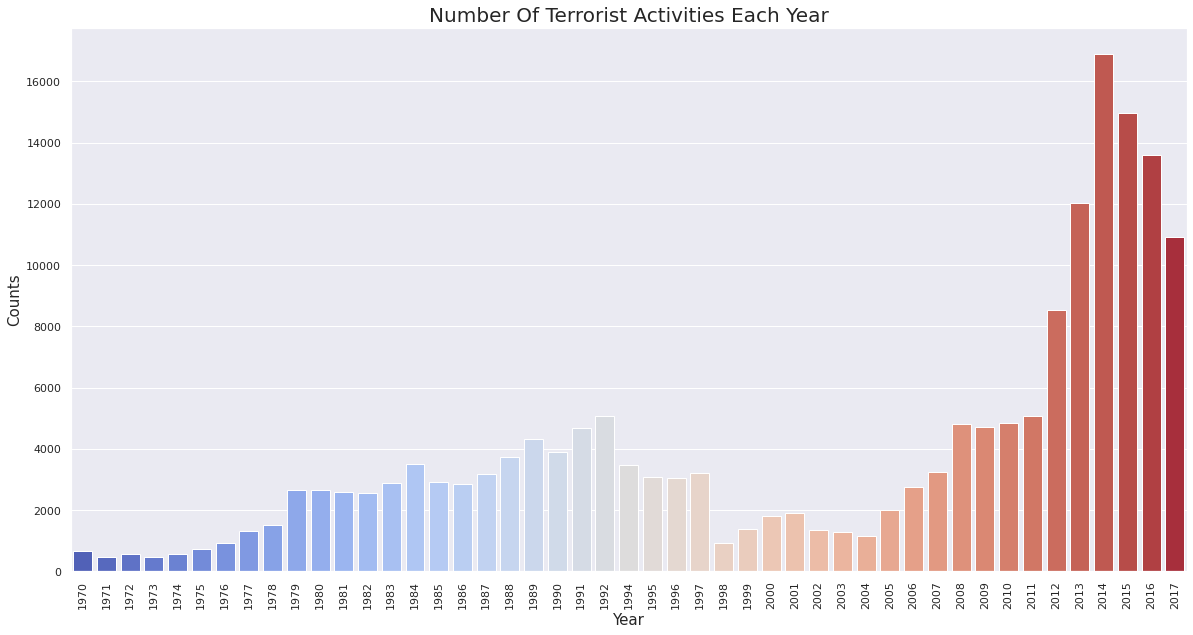

In [13]:
plt.figure(figsize = (20,10))
sns.set(style = 'darkgrid')
sns.barplot(x = v.index, y = v, data = new_df, palette = 'coolwarm')

plt.xticks(rotation  = 90)

plt.title('Number Of Terrorist Activities Each Year', fontsize = 20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights:__
- From here we can see that most of the attack happend in 2014. & Here we can observe the number of terrorist activities have gone up sharply after 2010.


### 4.2 Country affected by terrorism

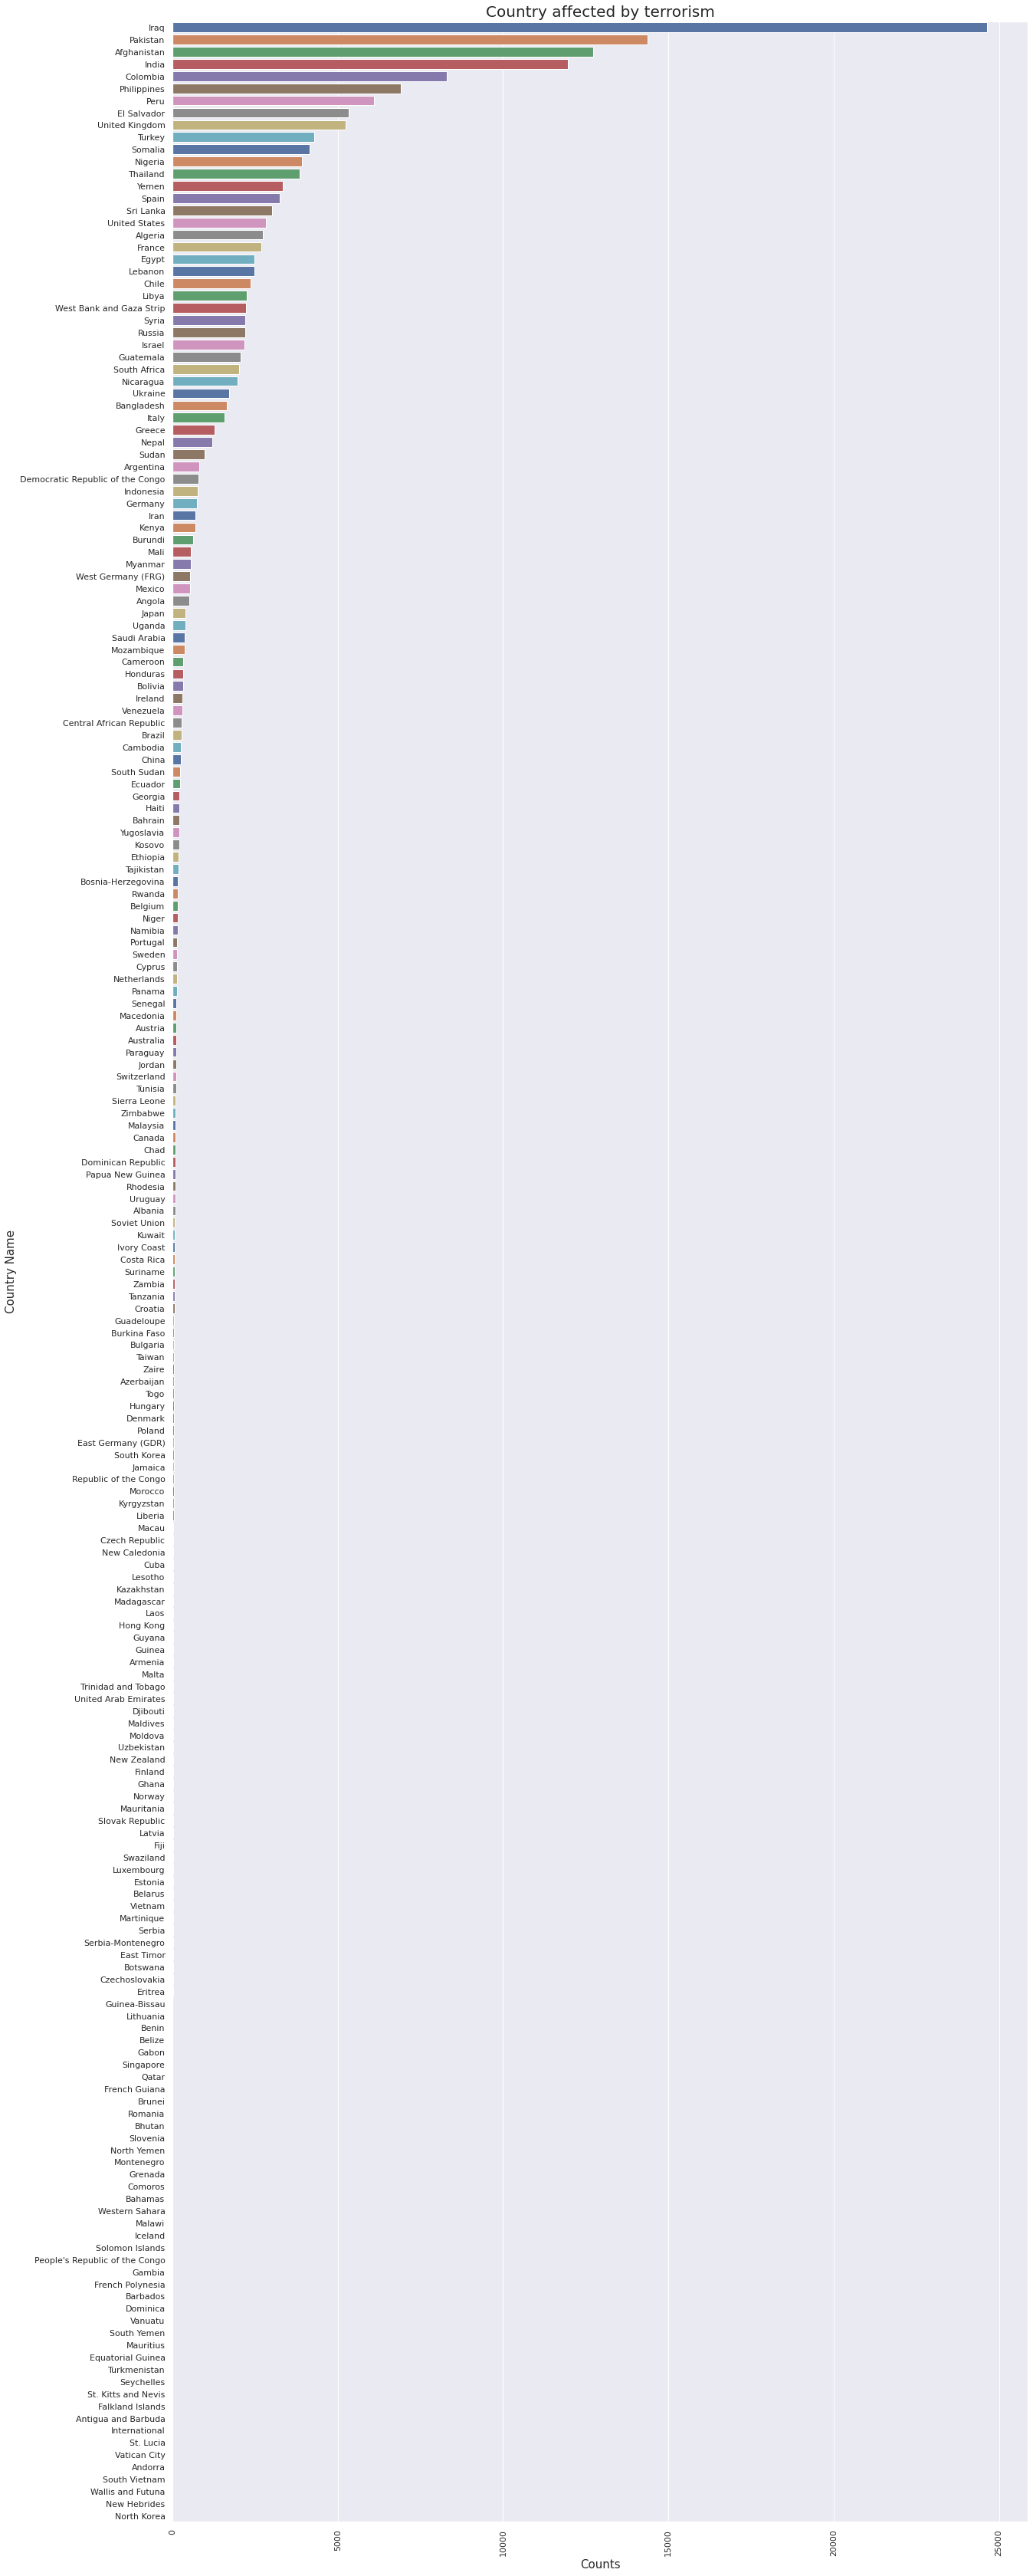

In [14]:
v = df['country_txt'].value_counts()
plt.figure(figsize = (20,60))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v, y = v.index, data = new_df, palette = 'deep')

plt.xticks(rotation  = 90)


plt.title('Country affected by terrorism', fontsize = 20)
plt.xlabel('Counts',fontsize = 15)
plt.ylabel('Country Name',fontsize = 15)
plt.show()


__Insights__:

- From here we can see that most of the terrorist attack happend in '__Iraq__', '__Pakistan__', '__Afghanistan__', '__India__' & '__Colombia__'.


### 4.3 Region affected by terrorism

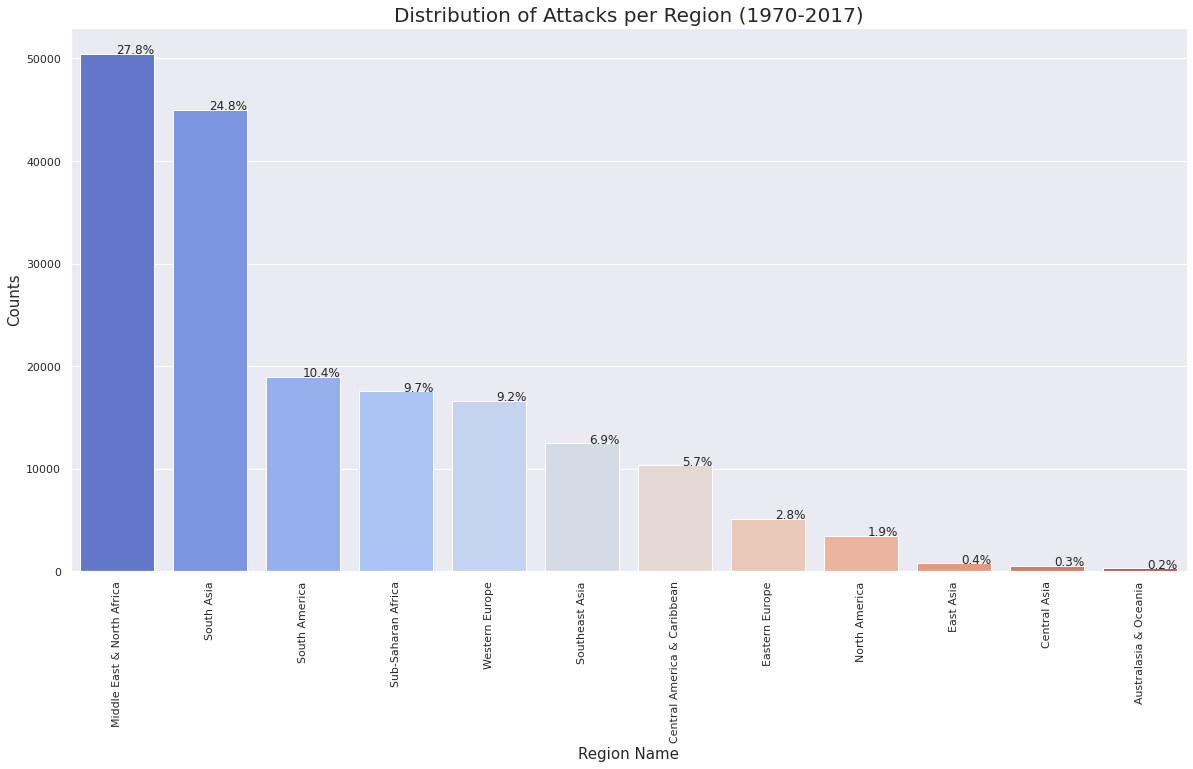

In [15]:
v = df['region_txt'].value_counts()
plt.figure(figsize = (20,10))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v.index, y = v, data = new_df, palette = 'coolwarm')

plt.xticks(rotation  = 90)
total = float(len(new_df['region_txt']))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.title('Distribution of Attacks per Region (1970-2017)', fontsize = 20)
plt.xlabel('Region Name',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights__:

- From here we can see that most of the terrorist attack happend in '__Middle East & North Africa__ region.The region represents 27.8% of all records between 1970 and 2017.


### 4.4 State affected by terrorism

- Let selected top 100 state all over the world.those mostly affected by terrorism.

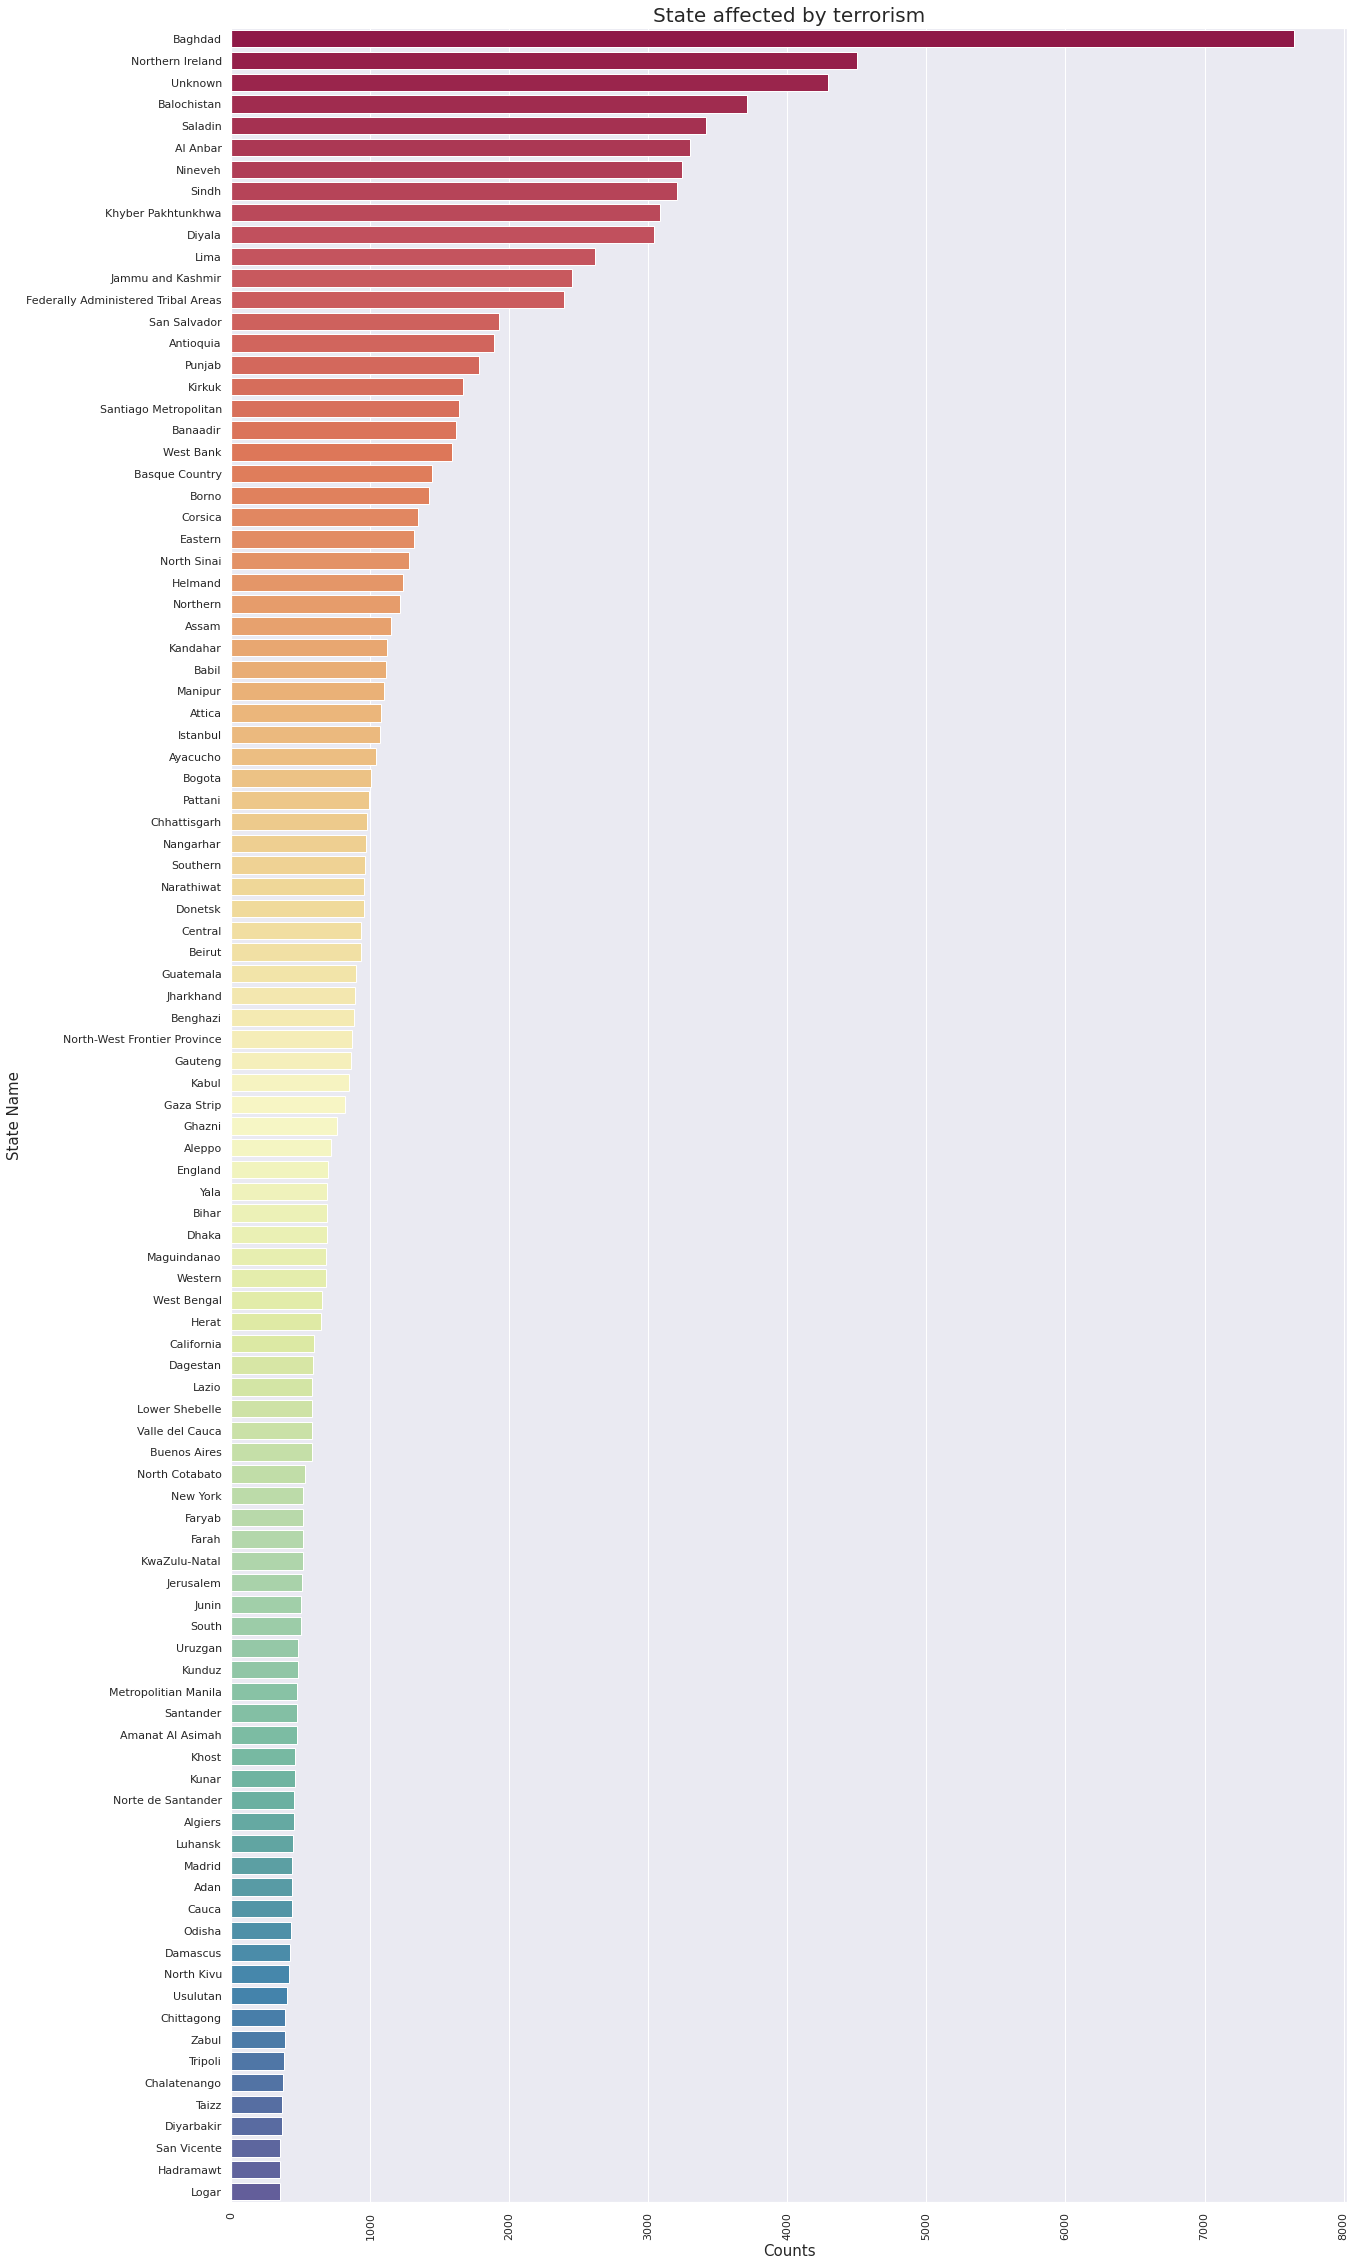

In [16]:
v = new_df['provstate'].value_counts()[:100]  # Here we selected  mostly  affected  100 states by terrorism.
plt.figure(figsize = (20,40))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v, y = v.index, data = new_df, palette = 'Spectral')

plt.xticks(rotation  = 90)


plt.title('State affected by terrorism', fontsize = 20)
plt.xlabel('Counts',fontsize = 15)
plt.ylabel('State Name',fontsize = 15)
plt.show()


__Insights__:

- From here above we can see that most of the terrorist attack happend in '__Baghdad__', '__Northern Ireland__' state from 1970 to 2017.


### 4.5 City affected by terrorism

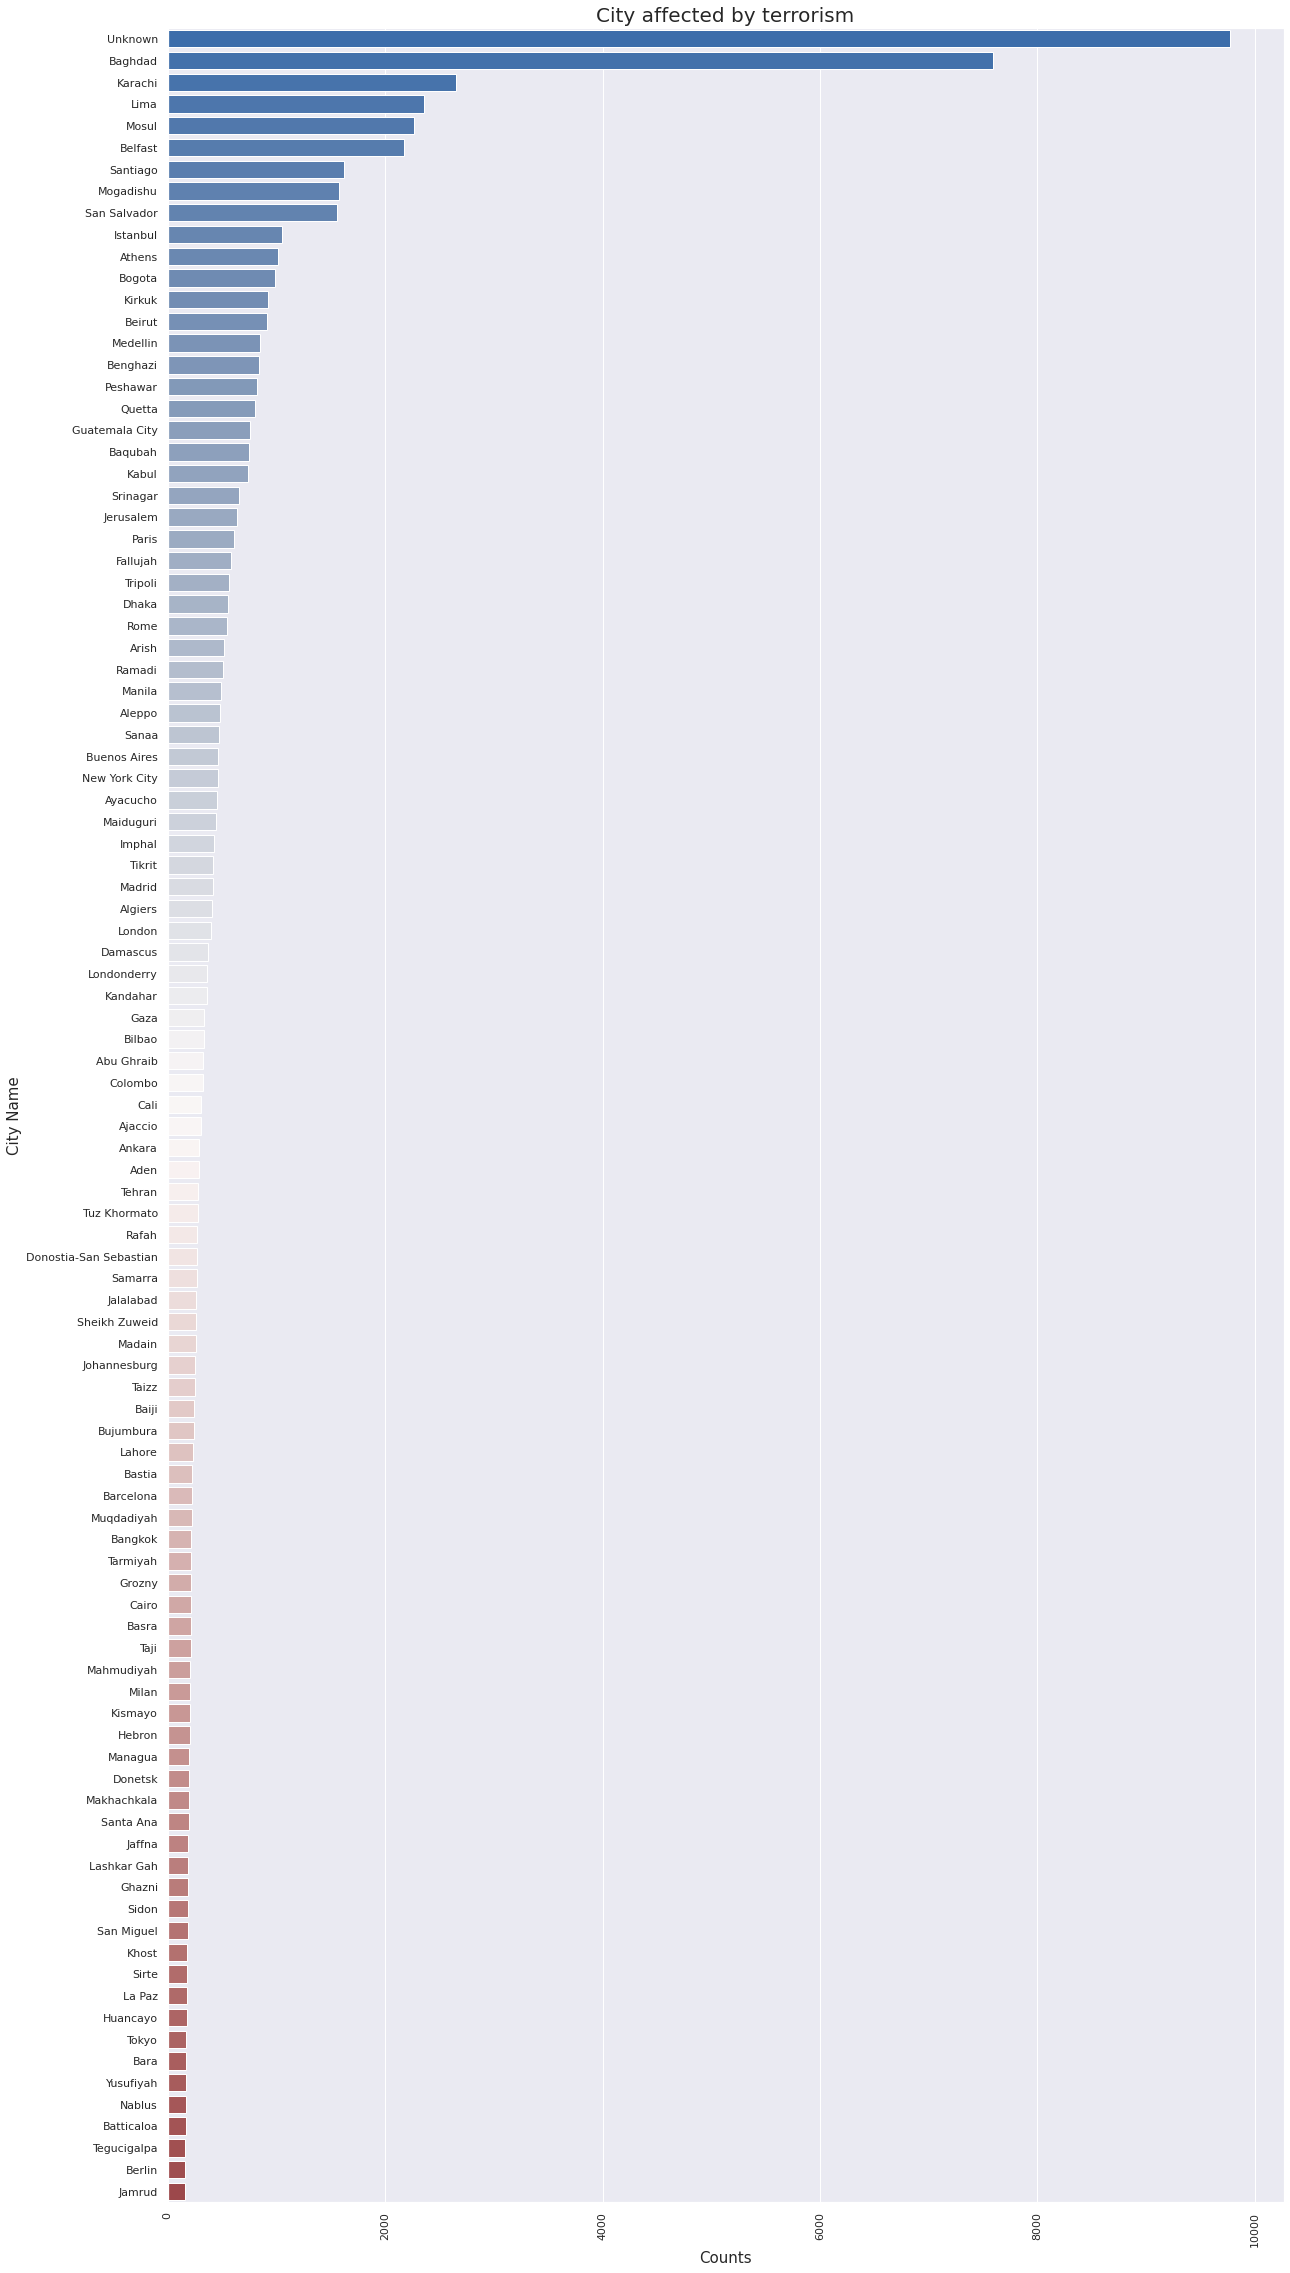

In [17]:
v = new_df['city'].value_counts()[:100]
plt.figure(figsize = (20,40))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v, y = v.index, data = new_df, palette = 'vlag')

plt.xticks(rotation  = 90)


plt.title('City affected by terrorism', fontsize = 20)
plt.xlabel('Counts',fontsize = 15)
plt.ylabel('City Name',fontsize = 15)
plt.show()


__Insights__:

- From here above we can see that most of the terrorist attack happend in '__Unknown__', '__Baghdad__', '__Karachi__' & '__Lima__' city from 1970 to 2017.



### 4.6 Terrorist attack Successed or failed

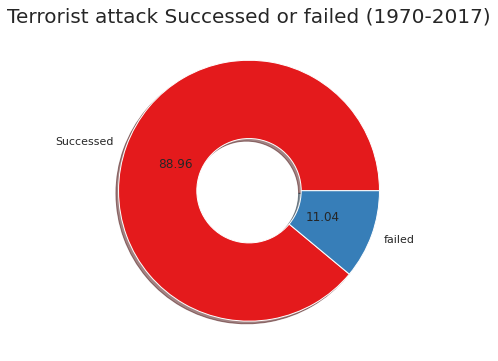

In [18]:
v = df['success'].value_counts()
fig = plt.gcf()
fig.set_size_inches((10,6))

cmap = plt.get_cmap('Set1')
color = cmap(np.arange(len(v)))
plt.pie(v, labels = ['Successed', 'failed'], autopct = '%0.02f', colors = color, 
        labeldistance = 1.1, wedgeprops= dict(width = 0.6), shadow = True)
plt.title('Terrorist attack Successed or failed (1970-2017)', fontsize = (20))
plt.show()

__Insights__:

- Here form above, we can see that approx 89% terrorist attack is sucessed and 11% is failed form 1970 to 2017.

### 4.7 Suicide or Not Suicide

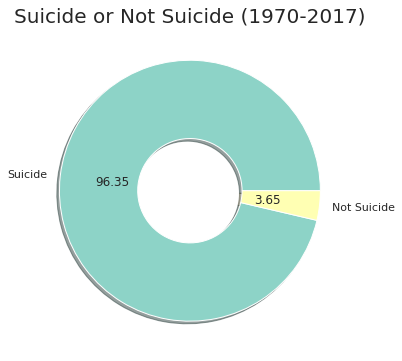

In [19]:
v = df['suicide'].value_counts()
fig = plt.gcf()
fig.set_size_inches((10,6))

cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))
plt.pie(v, labels = ['Suicide', 'Not Suicide'], autopct = '%0.02f', colors = color, 
        labeldistance = 1.1, wedgeprops= dict(width = 0.6), shadow = True)
plt.title('Suicide or Not Suicide (1970-2017)', fontsize = (20))
plt.show()

__Insights__:
- From above we can see that approx 97% terrorist attack was suicide & 3% wasn't suicide.

### 4.8 Attacktype

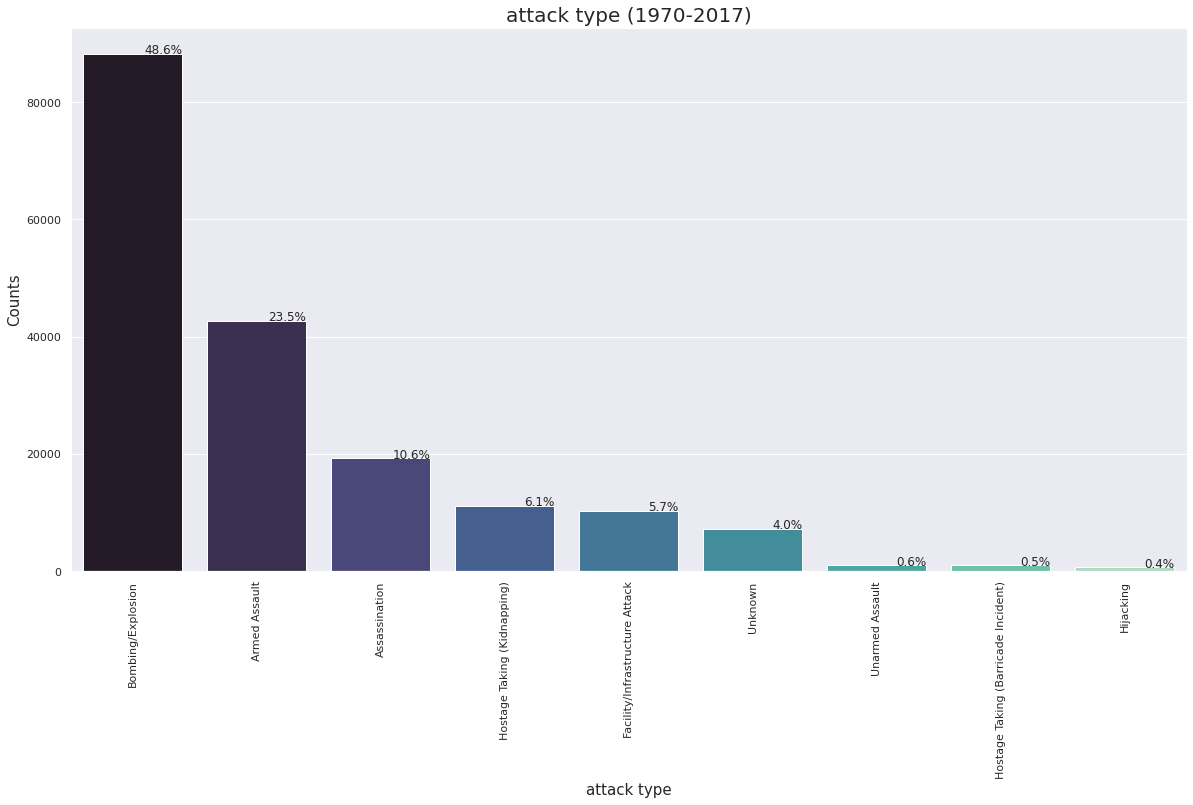

In [20]:
v = df['attacktype1_txt'].value_counts()
plt.figure(figsize = (20,10))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v.index, y = v, data = new_df, palette = 'mako')

plt.xticks(rotation  = 90)
total = float(len(new_df['attacktype1_txt']))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.title('attack type (1970-2017)', fontsize = 20)
plt.xlabel('attack type',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights__:
- From above we can see that Bombing/Explosion is most common terrorist attack.

### 4.9 Target type

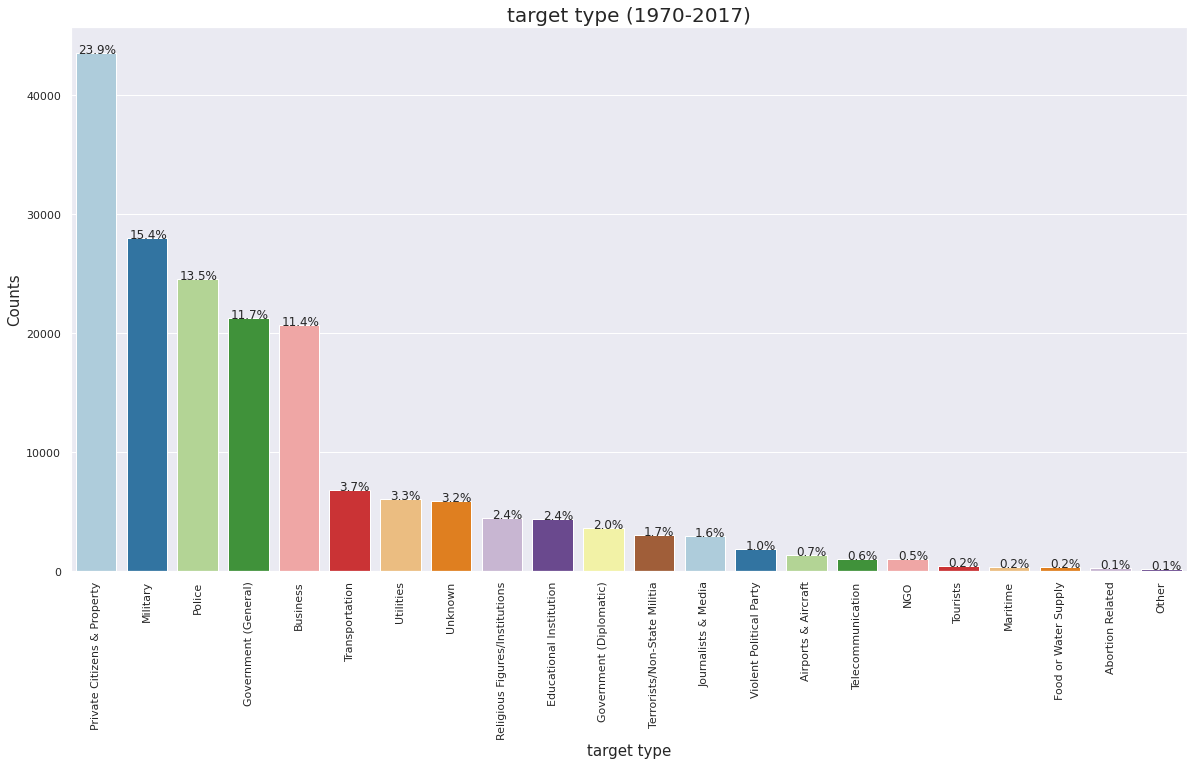

In [21]:
v = df['targtype1_txt'].value_counts()
plt.figure(figsize = (20,10))
sns.set(style = 'darkgrid')
ax = sns.barplot(x = v.index, y = v, data = new_df, palette = 'Paired')

plt.xticks(rotation  = 90)
total = float(len(new_df['targtype1_txt']))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.title('target type (1970-2017)', fontsize = 20)
plt.xlabel('target type',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights__:
- From above we can see terrorist attack mostly affected the __Private Citizens & Property__. that is approx 49% from (1970-2017).

### 4.10 Top 20 terrorist group name

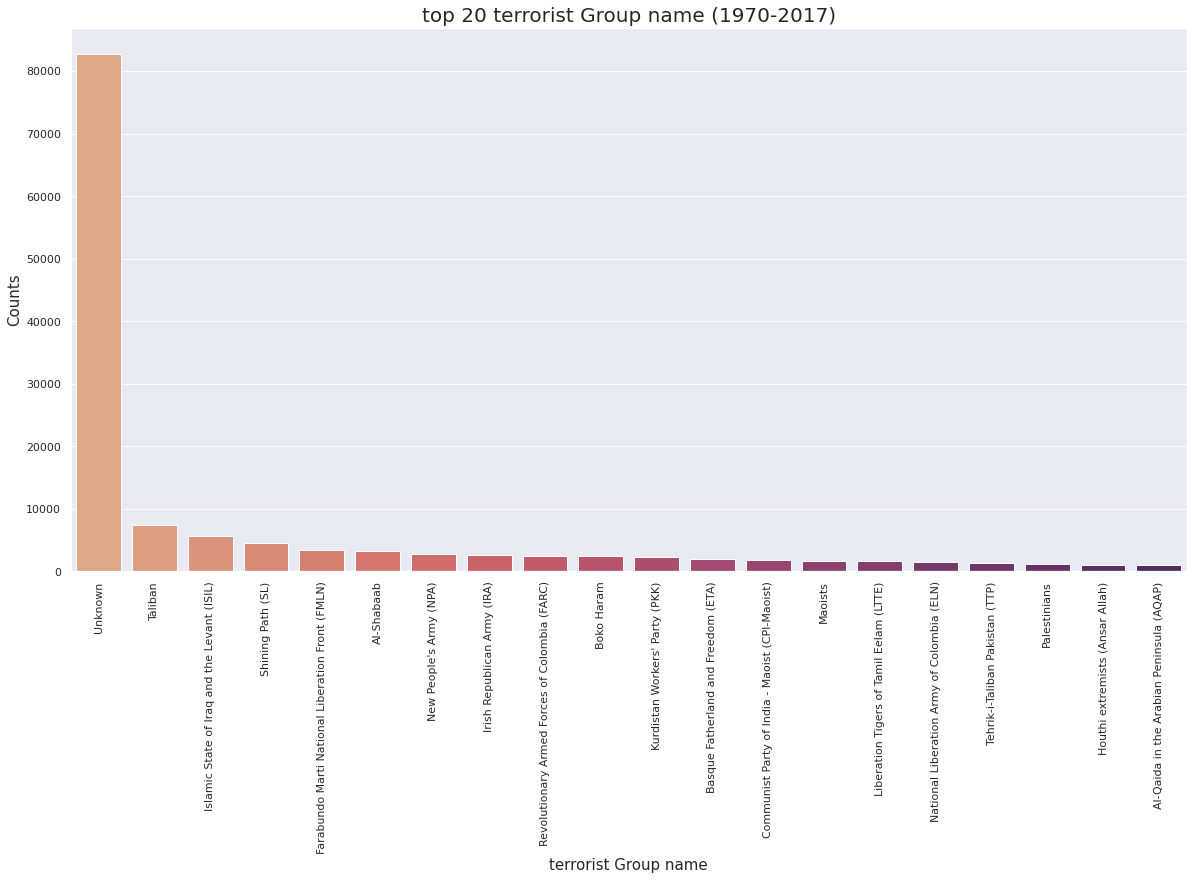

In [22]:
v  = df['gname'].value_counts()[:20]  # top 20 terrorist group name
plt.figure(figsize = (20,10))
sns.set(style = 'darkgrid')
sns.barplot(x = v.index, y = v, data = new_df, palette = 'flare')
plt.xticks(rotation  = 90)

plt.title('top 20 terrorist Group name (1970-2017)', fontsize = 20)
plt.xlabel('terrorist Group name',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights__:
- From above we can see that some famous terrorist group name was '__Unknown__', '__Taliban__', '__Islamic State of Iraq and the Levant (ISIL)__ form 1970 to 2017.

### 4.21 Weapon type

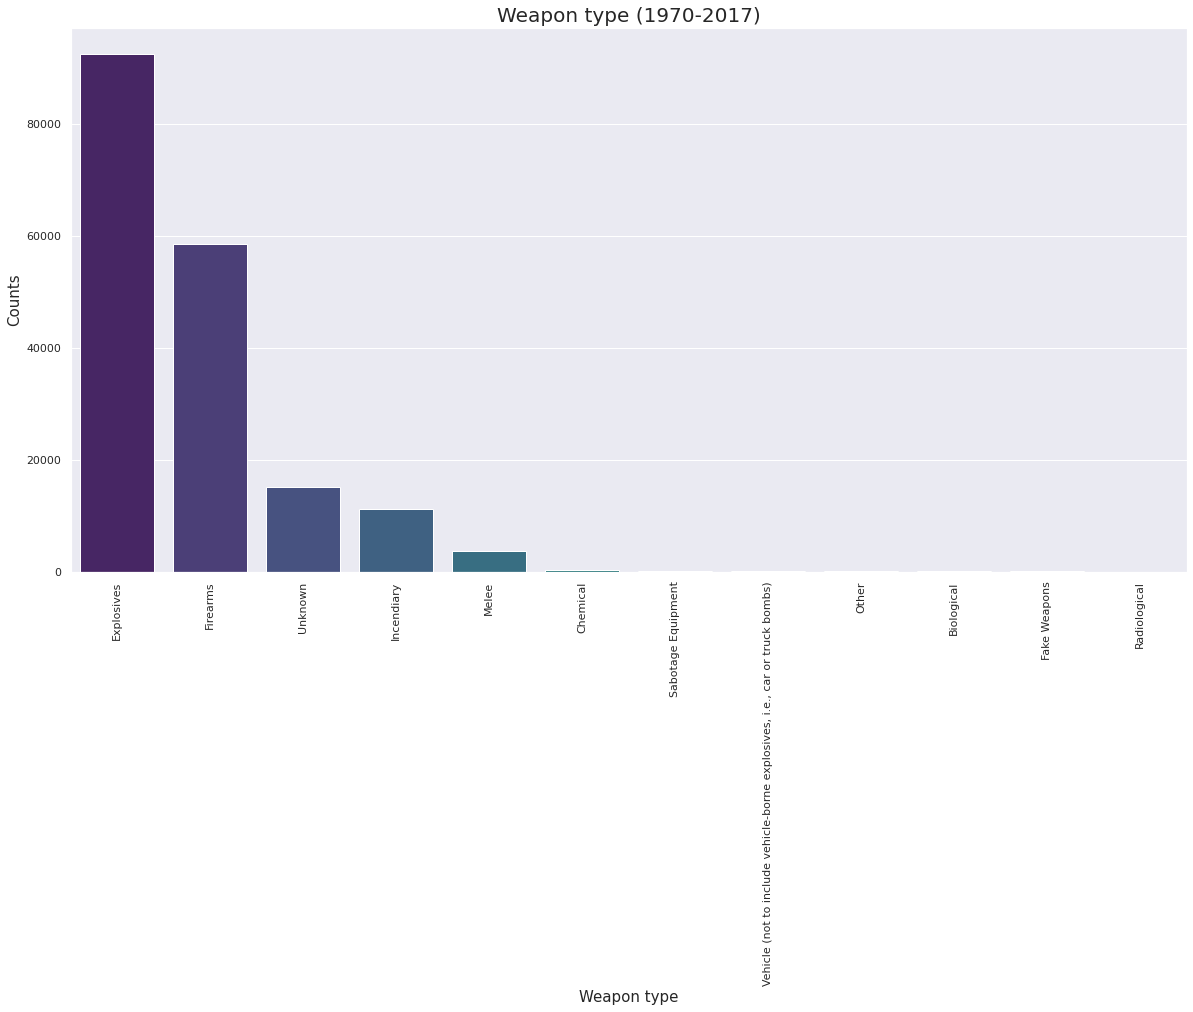

In [23]:
v= df['weaptype1_txt'].value_counts()
plt.figure(figsize = (20,10))

sns.barplot(x = v.index, y = v, data = new_df, palette = 'viridis')
plt.xticks(rotation = 90)

plt.title('Weapon type (1970-2017)', fontsize = 20)
plt.xlabel('Weapon type',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights__:
- From above we can see that most  famous weapon type was '__Explosives__' form 1970 to 2017.

### 4.22 Successful/unsuccessful terrorist strike

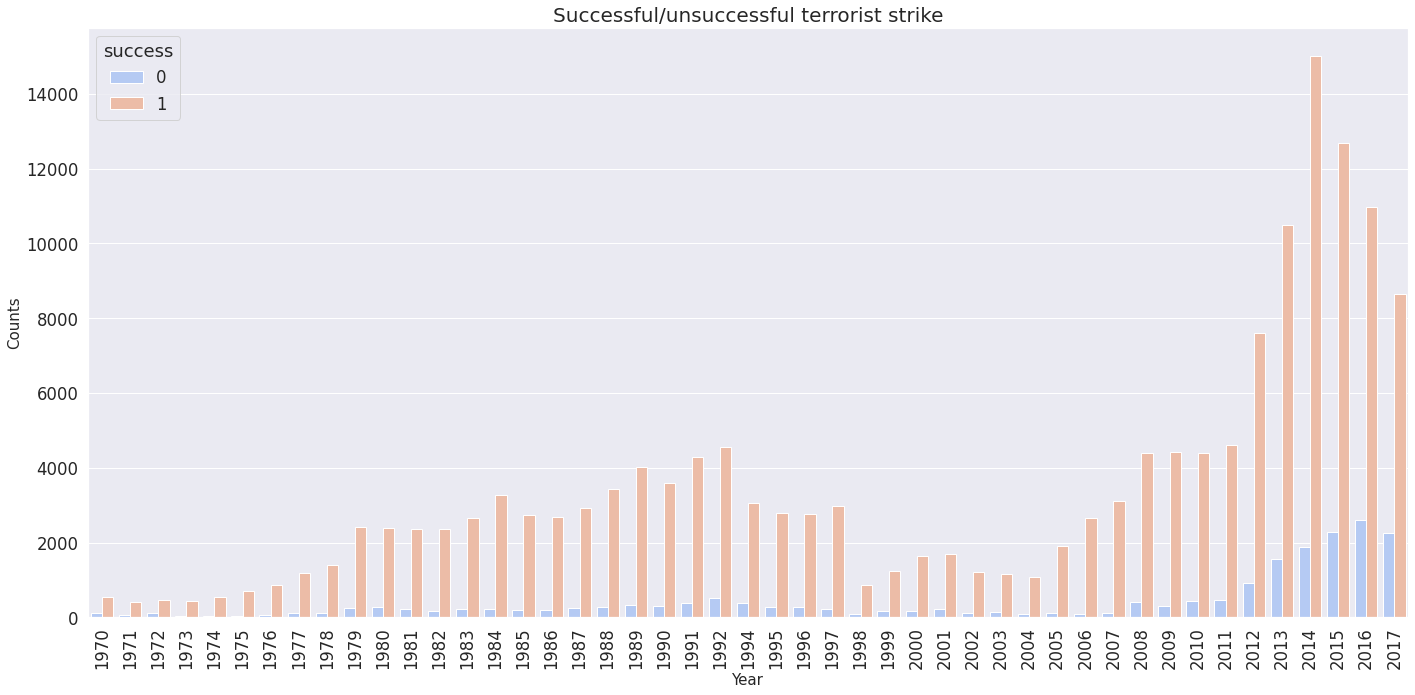

In [24]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=new_df,hue='success', orient='v',palette = 'coolwarm')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.title('Successful/unsuccessful terrorist strike', fontsize=20)

plt.xticks(rotation=90)
plt.tight_layout()

### 4.23 The incident was/wasn't a suicide attack (1970-2017)

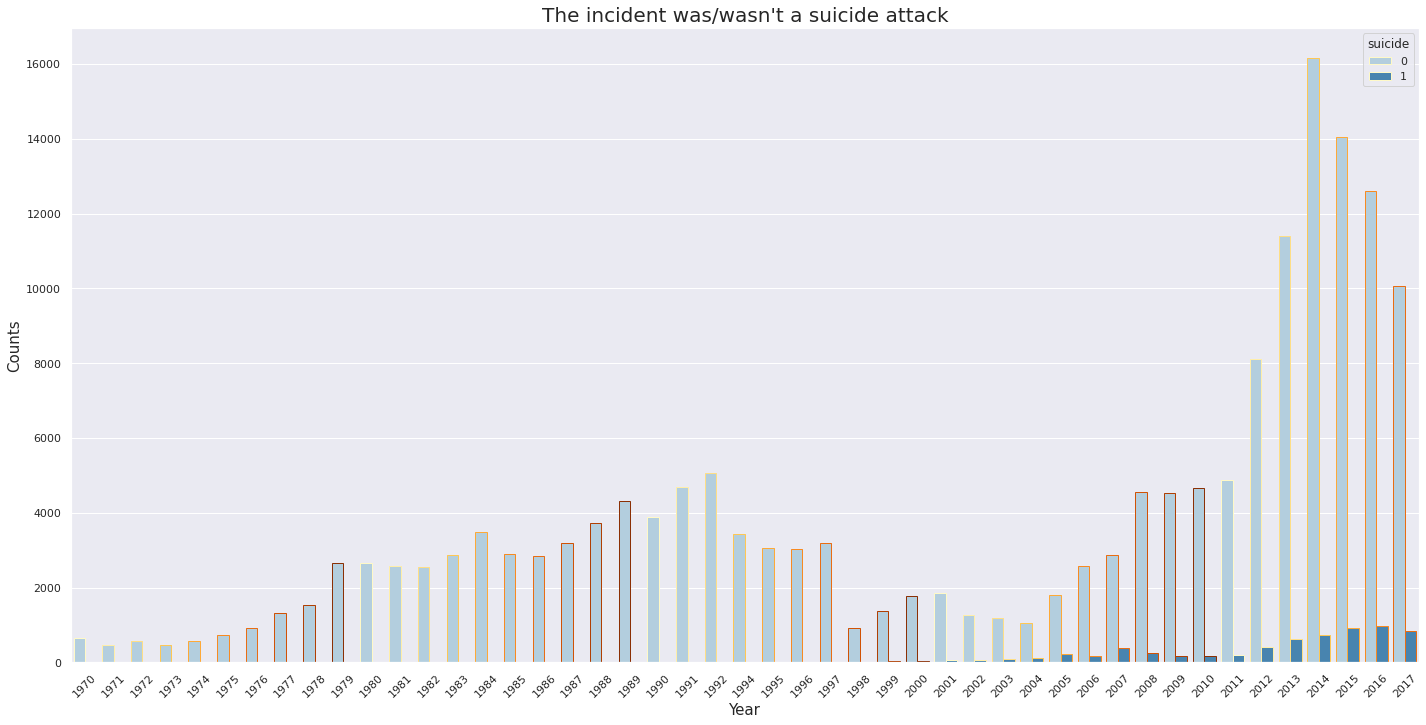

In [25]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=new_df,hue='suicide',  palette = 'Blues',edgecolor=sns.color_palette("YlOrBr", 10));
plt.title("The incident was/wasn't a suicide attack", fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### 4.24 Highest No. of  people killed by country

In [26]:
 c = new_df.groupby('country_txt')
 x = c['nkill'].agg(np.sum)


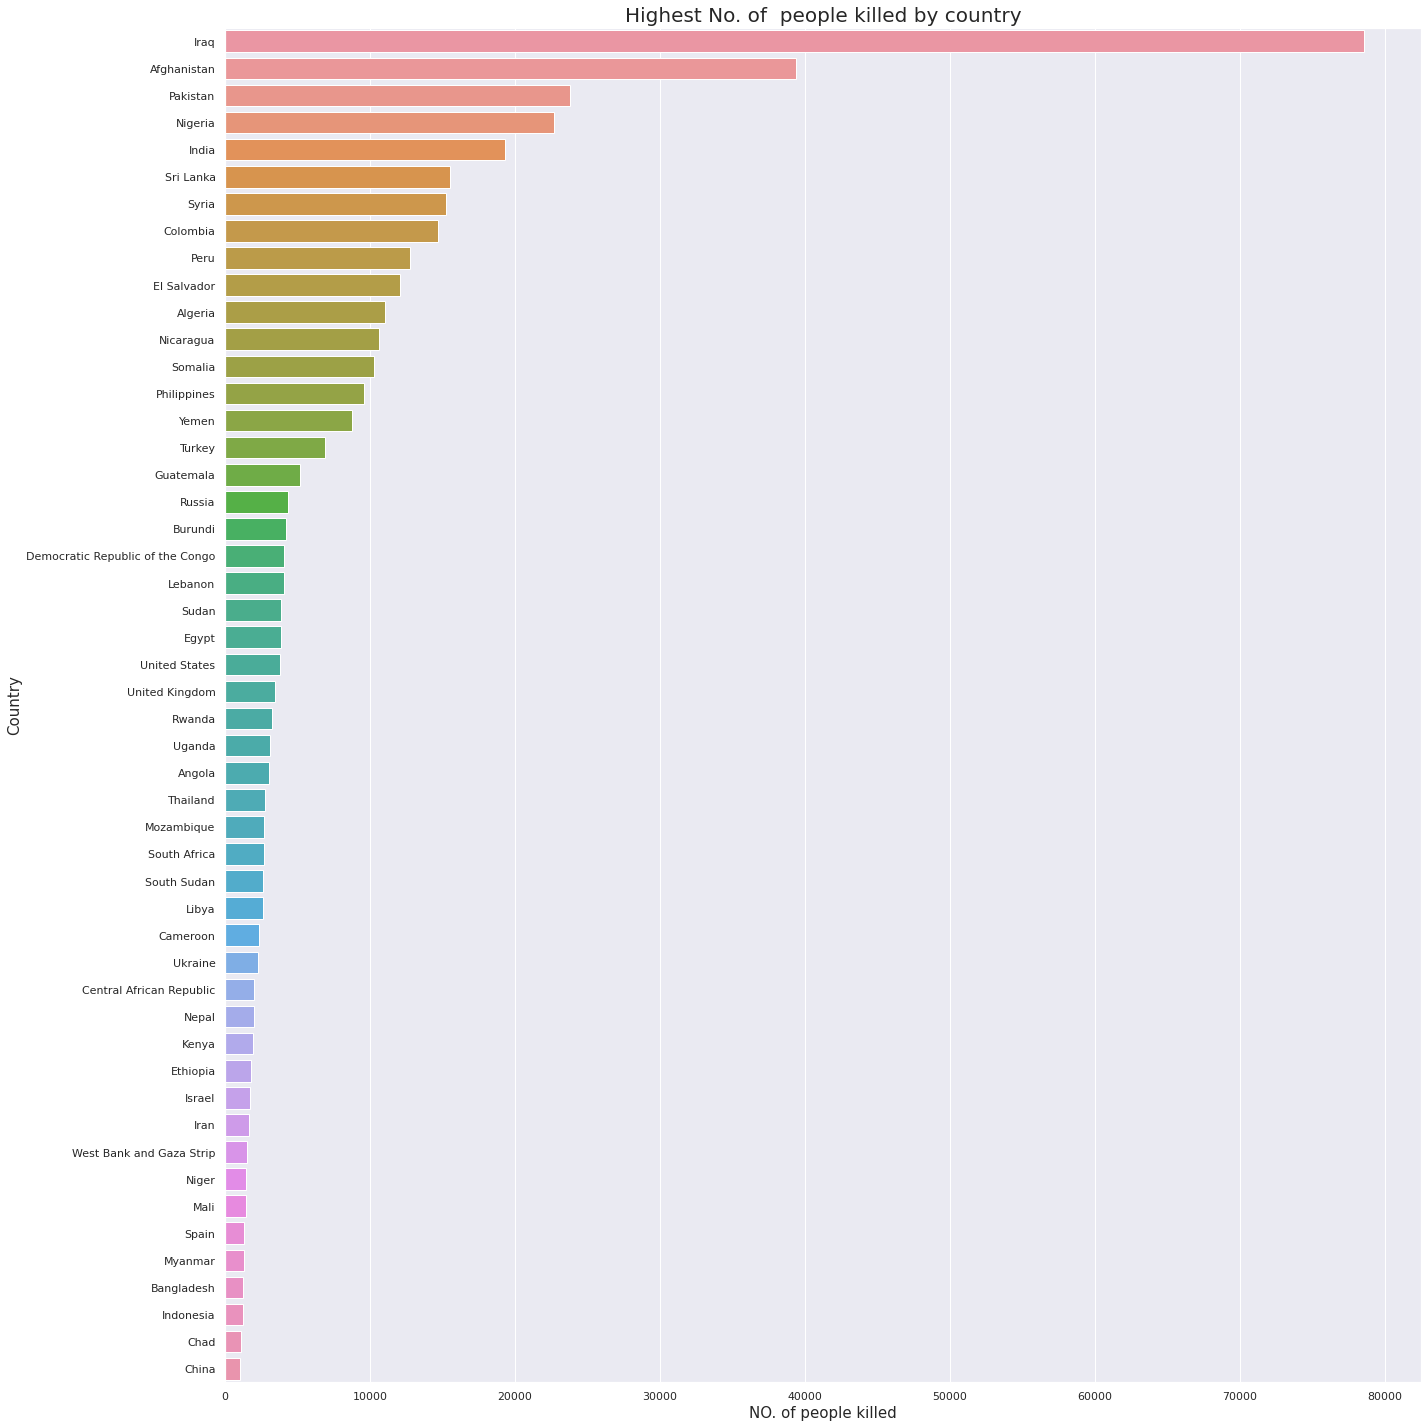

In [27]:
plt.figure(figsize = (20,20))
sns.barplot(x = x.nlargest(n = 50), y= x.nlargest(n = 50).index)   # n= 50 (selected 50 largest country based on terrorism activity)
plt.title("Highest No. of  people killed by country", fontsize=20)
plt.xlabel('NO. of people killed',fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.tight_layout()
plt.show()

__Insights:__
- Highest Number of death of people happend in __Iraq__, __Afganisthan__, __Pakisthan__, __Nigeria__ & __India__ from 1970 to 2017. 

### 4.24 Highest No. of people killed by Region

<Figure size 1440x720 with 0 Axes>

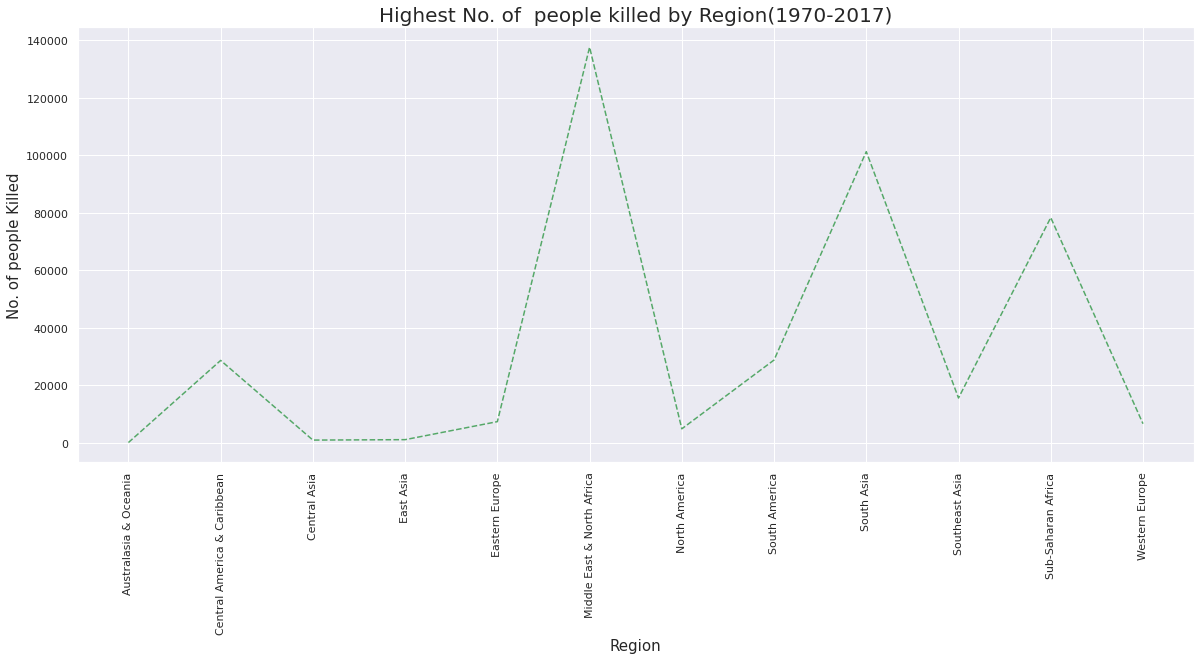

In [28]:
plt.figure(figsize = (20,10))
region_grp = df.groupby('region_txt')
v = region_grp['nkill'].agg(np.sum)

plt.figure(figsize=(20,8))
plt.plot(v,'g--')
plt.xticks(rotation=90)
plt.title('Highest No. of  people killed by Region(1970-2017)', fontsize = 20)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('No. of people Killed', fontsize=  15)
plt.show()

__Insights:__
- Highest No. of people killed in __Middle east and Africa__ region(1970-2017).

### 4.25 Highest No. of  people killed by State

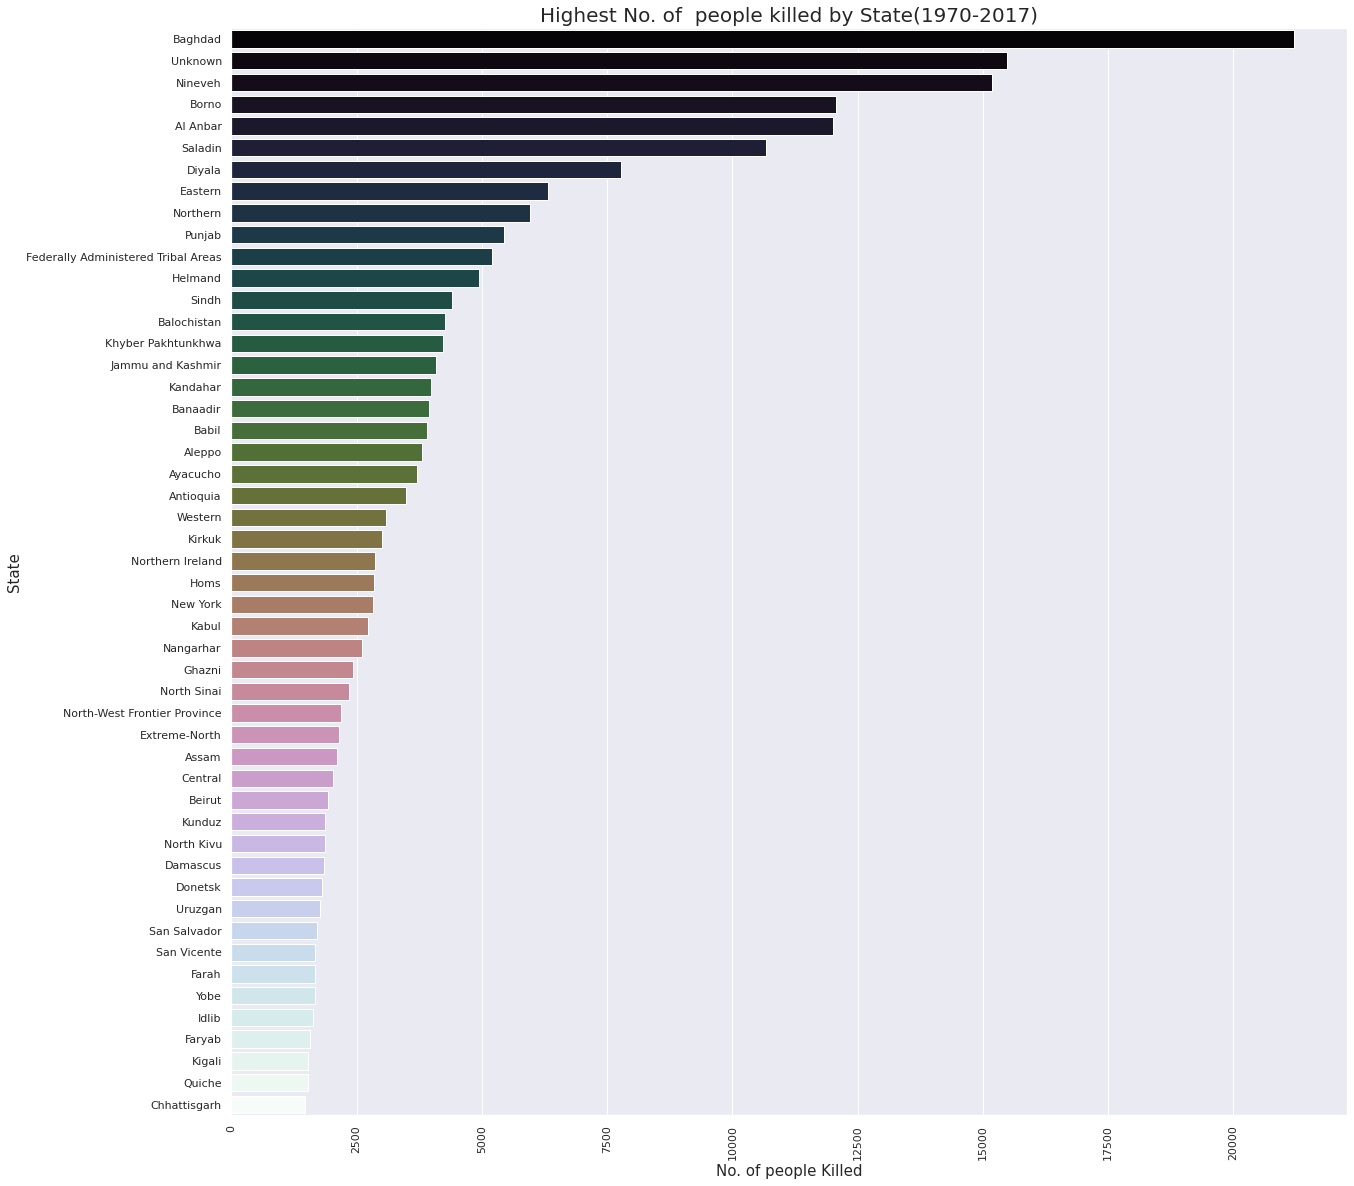

In [29]:
state_grp = df.groupby('provstate')
v = state_grp['nkill'].agg(np.sum)
value = v.nlargest(n= 50)  # top 50 states where people killed by terrorist attack
plt.figure(figsize=(20,20))
sns.barplot(x = value, y = value.index, palette = 'cubehelix')

plt.xticks(rotation=90)
plt.title('Highest No. of  people killed by State(1970-2017)', fontsize = 20)
plt.xlabel('No. of people Killed', fontsize = 15)
plt.ylabel('State', fontsize=  15)
plt.show()

__Insights:__
- Highest No. of people killed in __'Baghdad'__, __'Unknown'__, __'Nineveh'__, __'Borno'__ 7 __'Al Anbar'__ states from(1970-2017).

### 4.26 Highest No. of  people killed by city

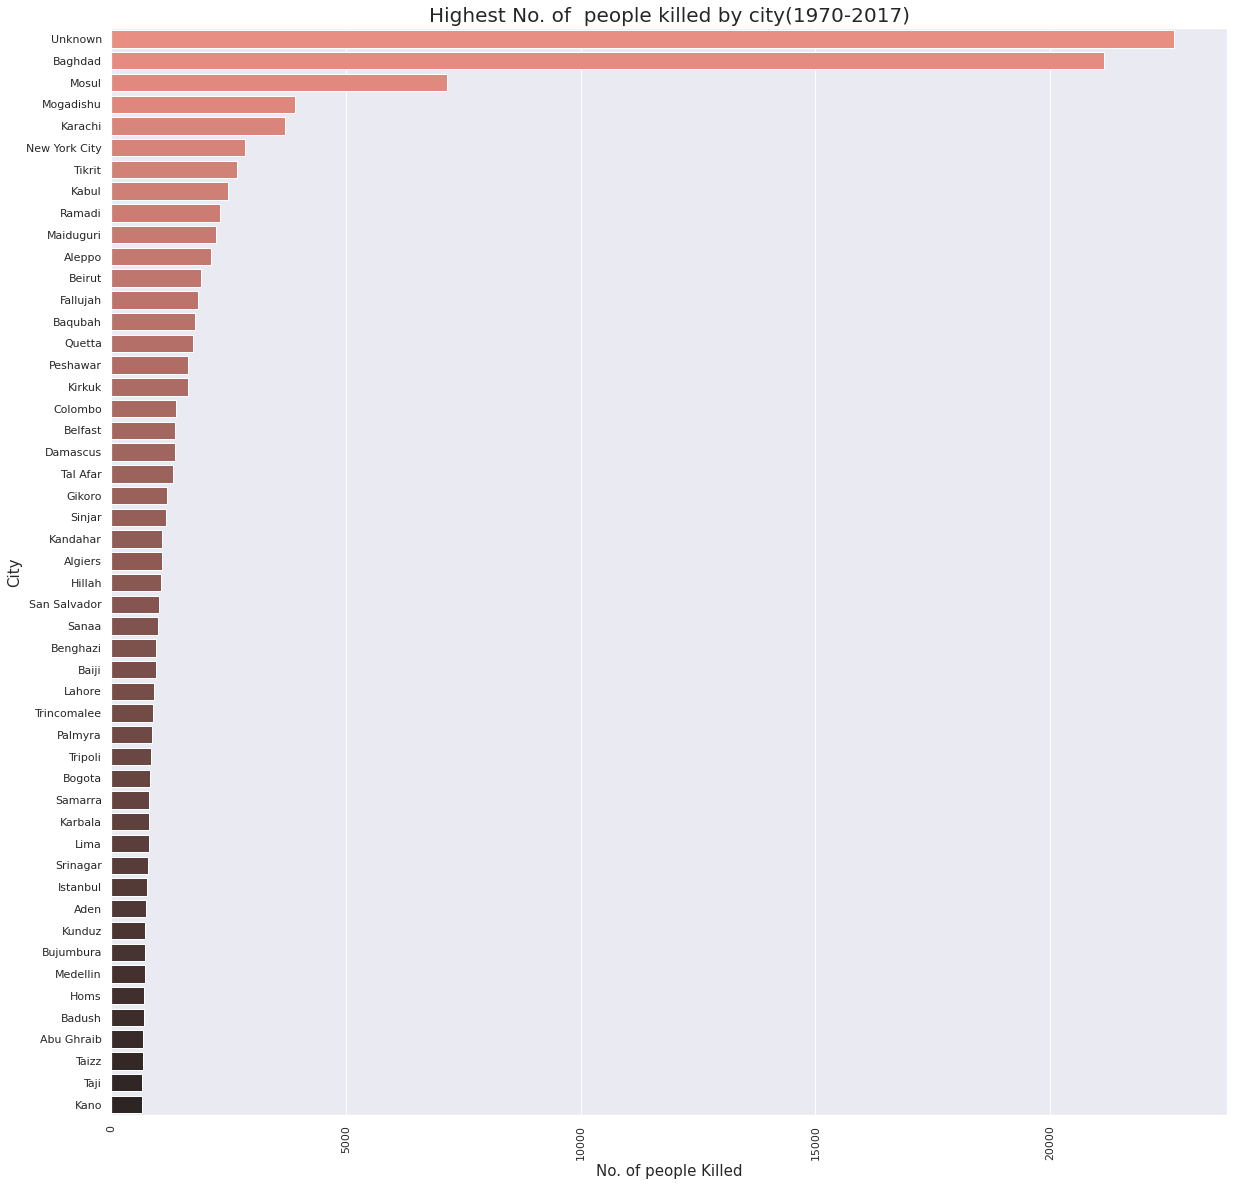

In [30]:
state_grp = df.groupby('city')
v = state_grp['nkill'].agg(np.sum)
value = v.nlargest(n= 50)  # top 50 cities where highest people killed by terrorist attack
plt.figure(figsize=(20,20))
sns.barplot(x = value, y = value.index, palette = 'dark:salmon_r')

plt.xticks(rotation=90)
plt.title('Highest No. of  people killed by city(1970-2017)', fontsize = 20)
plt.xlabel('No. of people Killed', fontsize = 15)
plt.ylabel('City', fontsize=  15)
plt.show()

__Insights:__
- Highest No. of people killed in __'Unknown'__, __'Baghdad'__, __'Mosul'__, __'Mogadishu'__, & __'Karachi'__, 'New York City' cities from(1970-2017).

### 4.27 Terrorist Activities by Region each Year

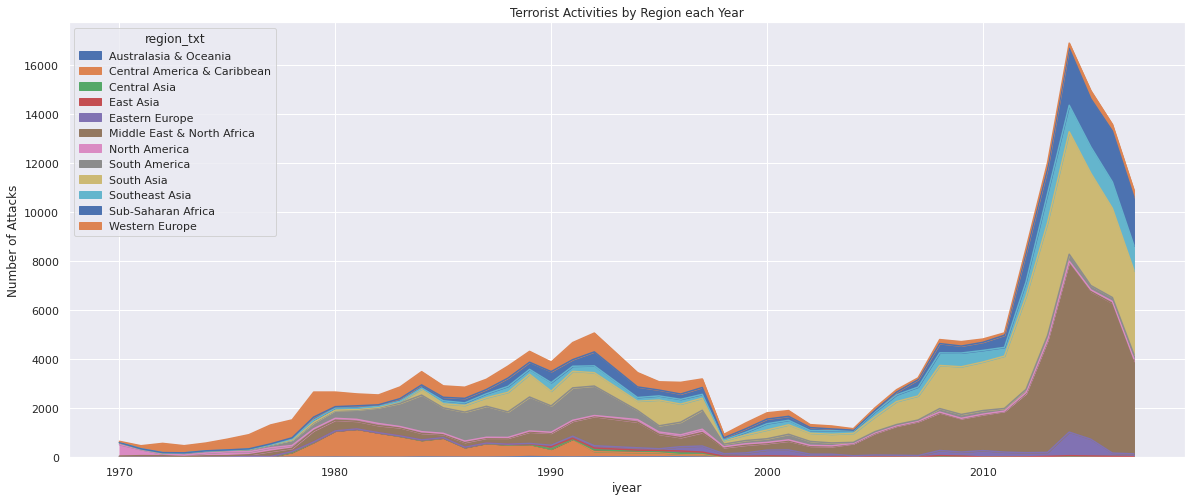

In [31]:

pd.crosstab(new_df.iyear, new_df.region_txt).plot(kind='area',figsize=(20,8))
plt.title('Terrorist Activities by Region each Year')
plt.ylabel('Number of Attacks')
plt.show()

__Insights:__
- Form the analysis Number of activities have gone up sharply after 2010 from(1970-2017).

### 4.28 Focusing on india

In [32]:
terror_india = new_df[new_df['country_txt'] == 'India']

### 4.28.1 Number Of terrorist activities each Year in India

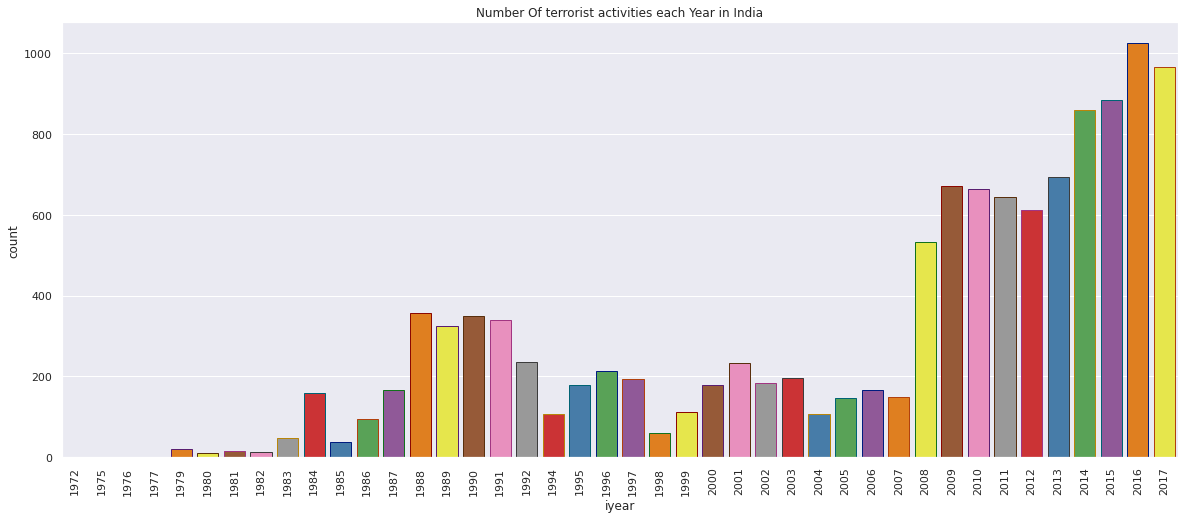

In [33]:
plt.subplots(figsize=(20,8))
sns.countplot('iyear',data=terror_india,palette='Set1',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of terrorist activities each Year in India')
plt.show()


__Insights:__
- Form the analysis Number of activities have gone up sharply after 2010 from(1970-2017) & and NO. of terrorist activity is higer in 2016 in india.

### 4.28.2 Number Of Total Attacks in Each Indian City

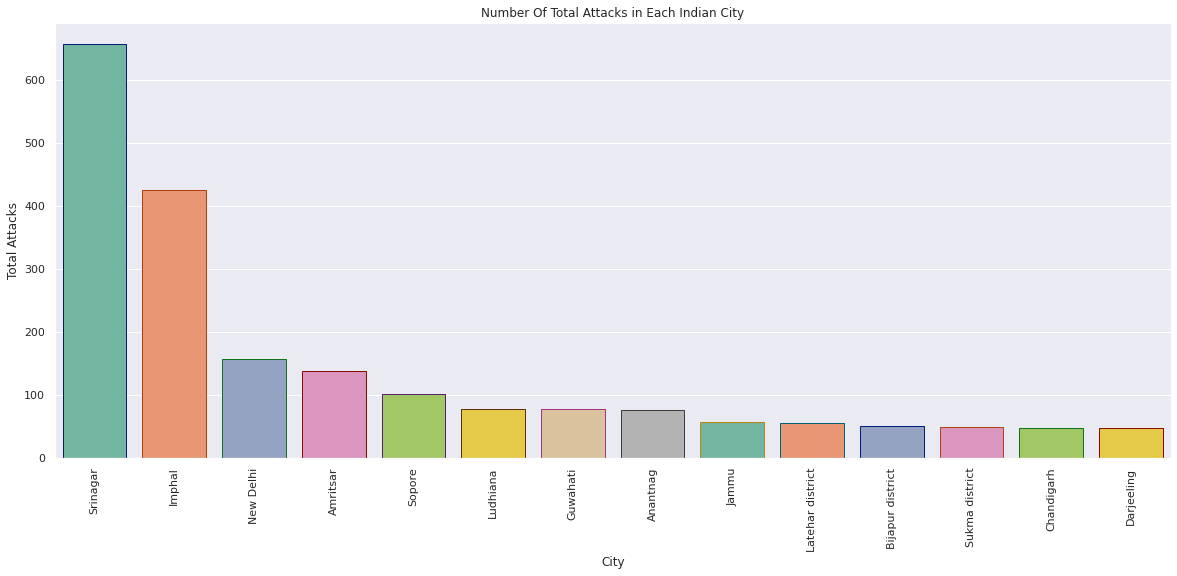

In [34]:
plt.subplots(figsize=(20,8))
city_attacks_india = terror_india.city.value_counts()[:15].reset_index()
city_attacks_india.columns = ['City', 'Total Attacks']
city_attacks_india.drop(1, inplace=True)
sns.barplot(x=city_attacks_india.City, y=city_attacks_india['Total Attacks'], palette='Set2',
            edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Indian City')
plt.show()


__Insights:__
- Form the analysis in Srinagar city terrorist activity is higher compare to another cities in india.

### 4.28.3 Terrorist Groups with Highest Terror Attacks in India

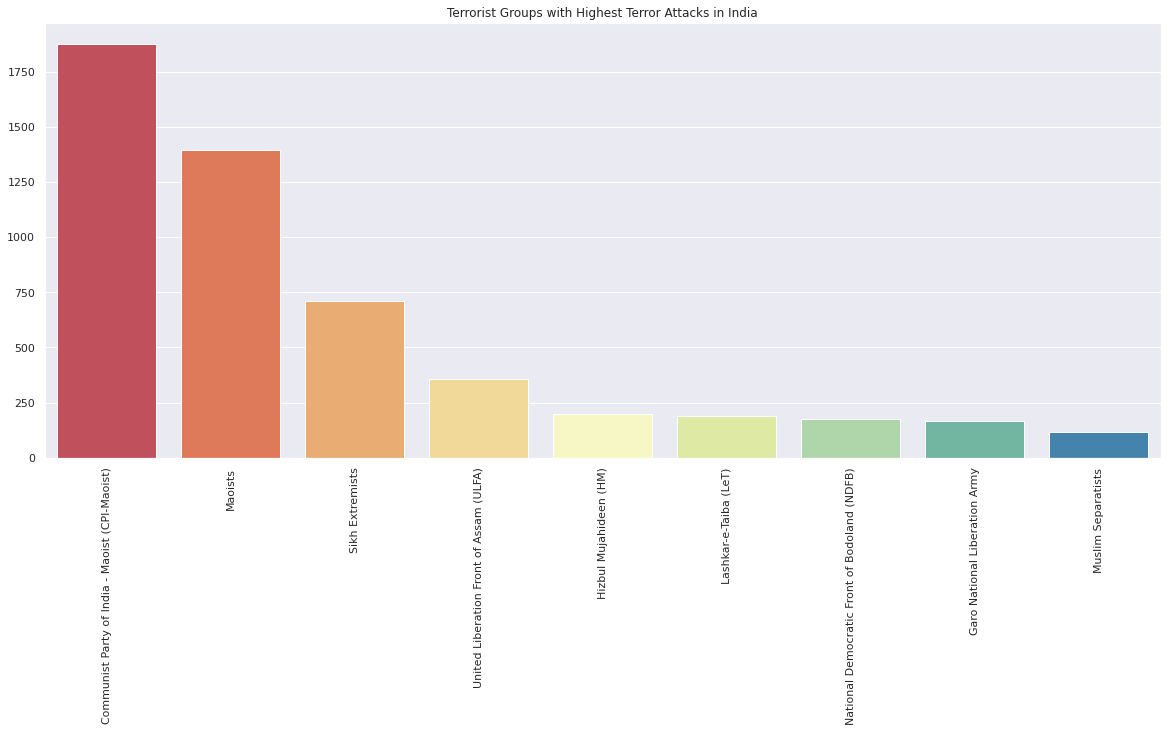

In [35]:
sns.barplot(y = terror_india['gname'].value_counts()[1:10].values,x = terror_india['gname'].value_counts()[1:10].index,palette='Spectral')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.title('Terrorist Groups with Highest Terror Attacks in India')
plt.show()


__Insights:__
- Form the analysis, __'Communist Party of India - Maoist (CPI-Maoist)'__ is terrorist group with highest terror attacks in india.


In [36]:
 terror_india['gname'].value_counts()[1:10]

Communist Party of India - Maoist (CPI-Maoist)    1877
Maoists                                           1396
Sikh Extremists                                    710
United Liberation Front of Assam (ULFA)            357
Hizbul Mujahideen (HM)                             199
Lashkar-e-Taiba (LeT)                              187
National Democratic Front of Bodoland (NDFB)       174
Garo National Liberation Army                      166
Muslim Separatists                                 118
Name: gname, dtype: int64

## 5. Conclusion:

- From the analysis, we can see that most of the attack happend in 2014 & number of activities have gone up sharply after 2010.
- From the analysis, we can see that most of the terrorist attack happend in '__Iraq__', '__Pakistan__', '__Afghanistan__', '__India__' & '__Colombia__' countries.
-From the analysis, we can see that most of the terrorist attack happend in '__Middle East & North Africa__ region.The region represents 27.8% of all records between 1970 and 2017.
- From the analysis, most of the terrorist attack happend in '__Baghdad__', '__Northern Ireland__' states from 1970 to 2017.

- Most of the terrorist attack happend in '__Unknown__', '__Baghdad__', '__Karachi__' & '__Lima__' cities from 1970 to 2017.

- Approx 89% terrorist attack is __sucessed__ and 11% was __failed__ form 1970 to 2017.

- Approx 97% terrorist attack was suicide & 3% wasn't suicide.
- Bombing/Explosion is most common terrorist attack(1970-2017).

- terrorist attack mostly affected the __Private Citizens & Property__. that is approx 49% from (1970-2017).
- Some famous terrorist group name was '__Unknown__', '__Taliban__', '__Islamic State of Iraq and the Levant (ISIL)__ form 1970 to 2017.

- Most  famous weapon type was '__Explosives__' form 1970 to 2017.

- Highest Number of death of people happend in __Iraq__, __Afganisthan__, __Pakisthan__, __Nigeria__ & __India__  countries from 1970 to 2017. 

- Highest No. of people killed in __Middle east and Africa__ region(1970-2017).
- Highest No. of people killed in __'Baghdad'__, __'Unknown'__, __'Nineveh'__, __'Borno'__ 7 __'Al Anbar'__ states from(1970-2017).
- Highest No. of people killed in __'Unknown'__, __'Baghdad'__, __'Mosul'__, __'Mogadishu'__, & __'Karachi'__, 'New York City' cities from(1970-2017).



- From the analysis of __india__, Number of activities have gone up sharply after 2010 from(1970-2017) & and NO. of terrorist activity is higer in 2016 in india.In Srinagar city terrorist activity is higher compare to another cities in india. __'Communist Party of India - Maoist (CPI-Maoist)'__ is terrorist group with highest terror attacks in india.

